In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [4]:
audio_path = 'sample.wav'
y,sr = librosa.load(audio_path,sr=None)

In [7]:
y.shape

(307200,)

Text(0, 0.5, 'Amplitude')

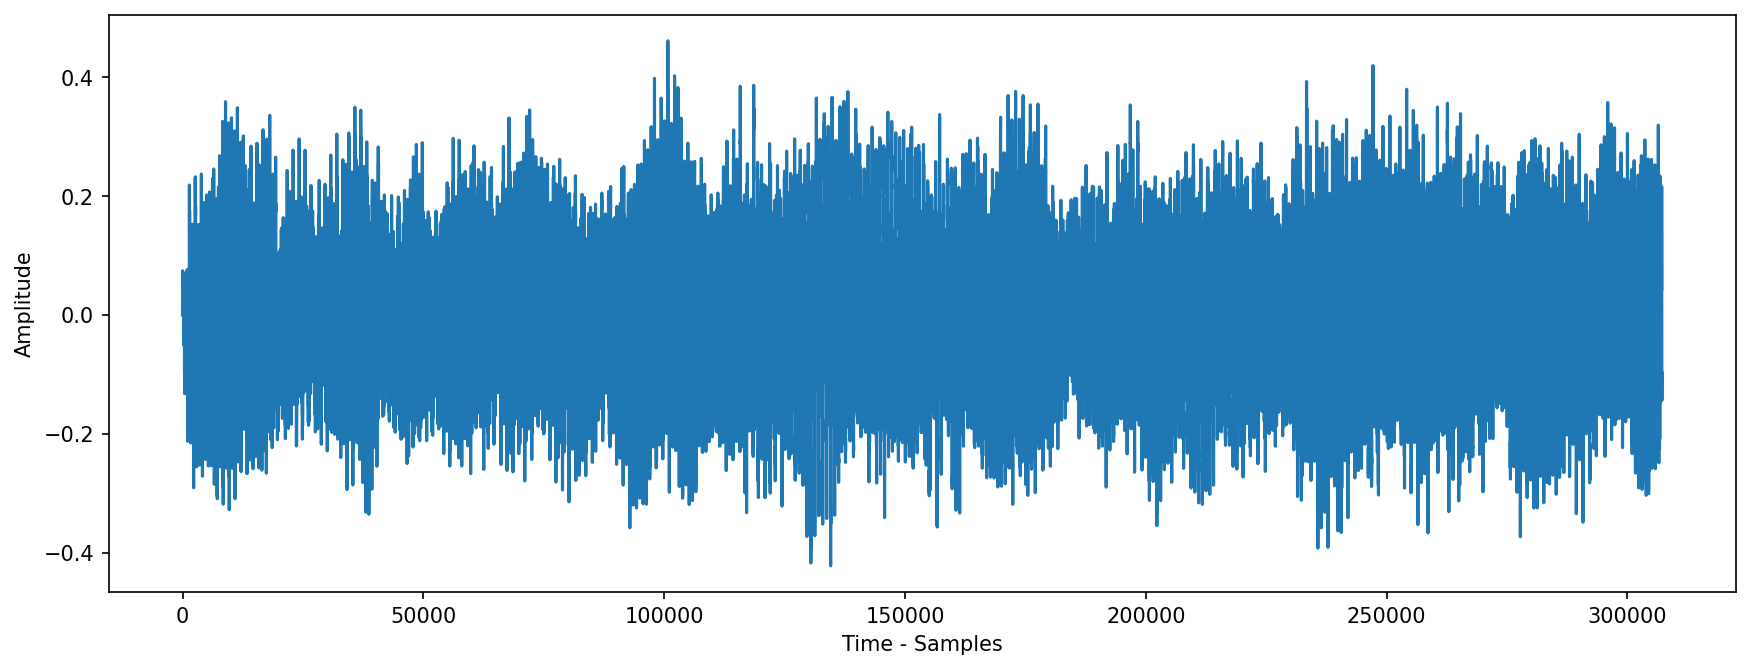

In [10]:
plt.figure(figsize=(14,5), dpi=150)
plt.plot(y)
plt.xlabel('Time - Samples')
plt.ylabel('Amplitude')

In [11]:
from IPython.display import Audio
Audio(data=y, rate=sr)

In [ ]:
# DFT = Discrete Fourier Transform

In [13]:
window = np.hanning(len(y))
windowed_input = y*window
dft = np.fft.rfft(windowed_input)

In [14]:
dft

array([-0.73934692+0.00000000e+00j, -0.40602659+3.47209567e+00j,
        1.35559349-4.39015046e+00j, ..., -0.00274378+3.73951519e-04j,
       -0.00250713-2.07743254e-03j,  0.00671166+0.00000000e+00j])

In [15]:
amplitude = np.abs(dft)

In [16]:
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)
amplitude_db

array([-67.76705414, -54.27319874, -51.8989202 , ..., -80.        ,
       -80.        , -80.        ])

In [18]:
frequency = librosa.fft_frequencies(sr=sr, n_fft=len(y))
frequency

array([0.00000000e+00, 1.56250000e-01, 3.12500000e-01, ...,
       2.39996875e+04, 2.39998438e+04, 2.40000000e+04])

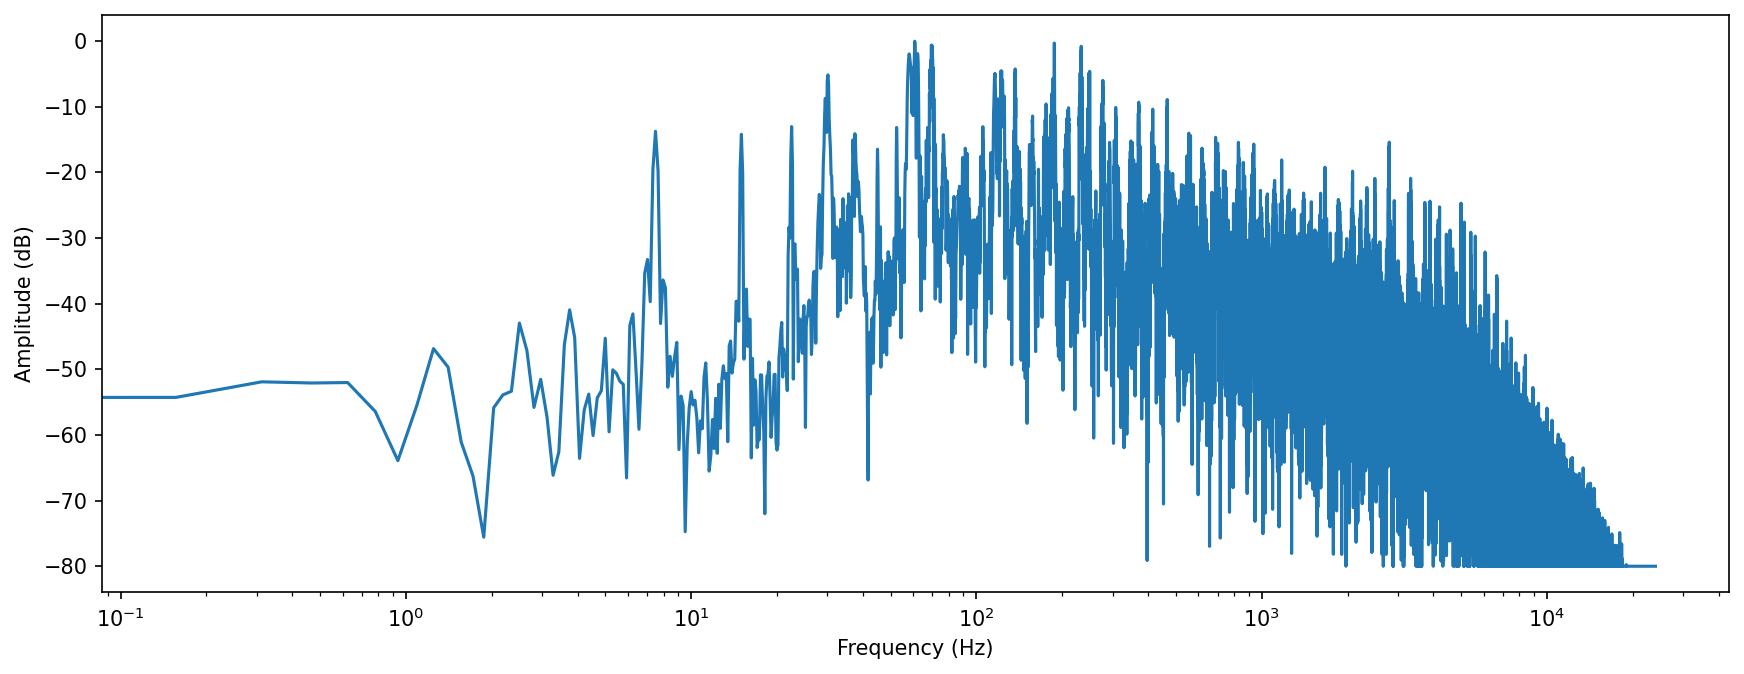

In [21]:
plt.figure(figsize=(14,5), dpi=150)
plt.plot(frequency, amplitude_db)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.xscale('log')


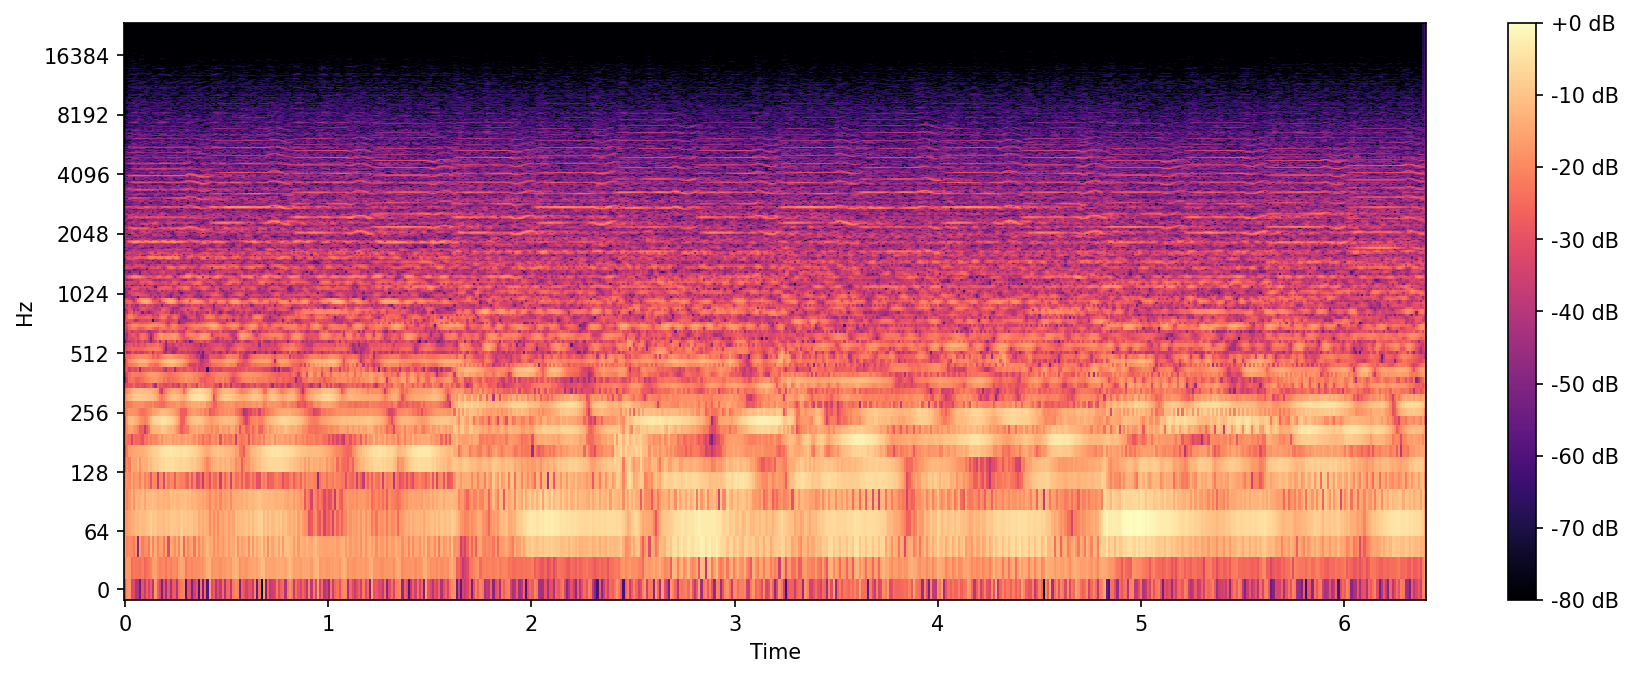

In [25]:
D = librosa.stft(y)
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(14,5), dpi=150)
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

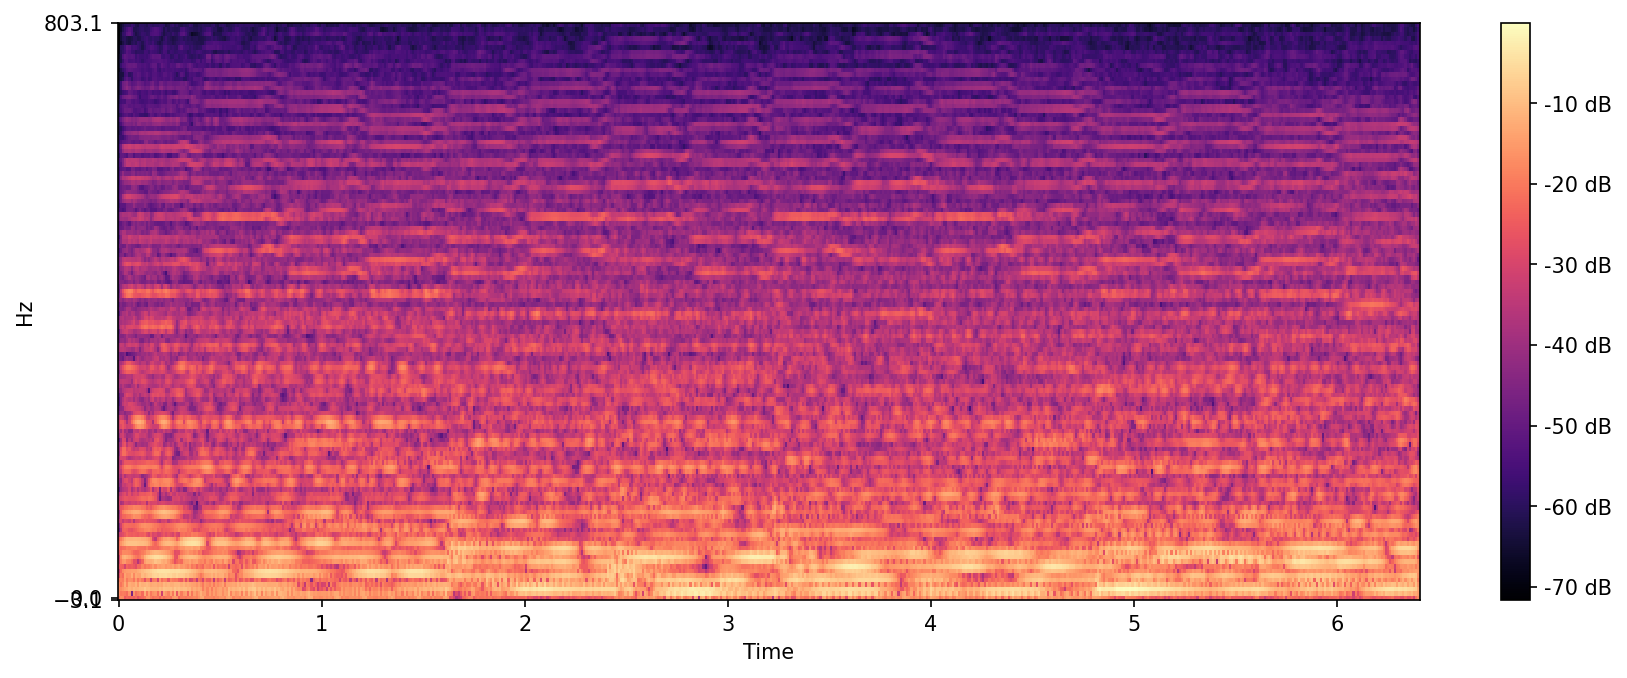

In [29]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(14,5), dpi=150)
librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=800)
plt.colorbar(format='%+2.0f dB')